<a href="https://colab.research.google.com/github/SytheTrip/PRAK-PWEB-SEM-5/blob/main/M6_Danang_Setiawan_50420330_PaintingGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Nama : Danang Setiawan
###NPM  : 50420330
###Kelas : 4IA15

## **Mount Google Drive to store files & data**

In [ ]:
#gunakan fungsi ini jika Anda menjalankan kode program pada google collab
#dan menggunakan google drive untuk menyimpan file gambar Anda,
#jika Anda menjalankan pada komputer Anda, abaikan blok program ini
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1) Importing Python Packages for GAN**


In [ ]:
import numpy as np
import imageio
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Reshape, Dense, Flatten, Conv2D, Conv2DTranspose, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import legacy  # Import the legacy optimizer

# Create a directory for generated images if it doesn't exist
import os
if not os.path.exists('generated_images'):
    os.makedirs('generated_images')

In [ ]:
##!unzip the-zip-file -d name-of-destination-folder
## the-zip-file : path dari folder sumber data yang akan anda gunakan
## name-of-destination-folder : nama folder yang tempat hasil file yang akan di unzip disimpan
## contoh : !unzip /content/drive/MyDrive/painting1k.zip -d 5kImage
!unzip /content/drive/MyDrive/paintings1k.zip -d 1kImage


## **Resizing Data to match Neural Network Input**

In [ ]:
import os
import cv2

images_path = "/content/1kImage"  # Replace with the actual path to your images directory
reshape_size = (64, 64)

os.makedirs('resized_images', exist_ok=True)

i = 0
for image in os.listdir(images_path):
    img_path = os.path.join(images_path, image)
    img = cv2.imread(img_path)
    img = cv2.resize(img, reshape_size)
    cv2.imwrite("resized_images/%d.png" % i, img)
    i += 1


## **2) Parameters for Neural Networks & Data**

In [ ]:
img_width = 32
img_height = 32
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam(lr=0.0002)

## **3) Building Generator**





In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, LeakyReLU, Conv2DTranspose, Conv2D

latent_dim = 100  # You need to define the latent dimension

def build_generator():
    model = Sequential()
    model.add(Dense(256 * 4 * 4, input_shape=(latent_dim,)))  # Added ',' to make it a tuple
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4, 4, 256)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
    model.summary()
    return model

generator = build_generator()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

## **4) Building Discriminator**

In [ ]:
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=legacy.Adam(lr=0.0002), metrics=['accuracy'])

## **5) Connecting Neural Networks to build GAN**

In [ ]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)

GAN.compile(loss='binary_crossentropy', optimizer=adam)

In [ ]:
# generator.summary()
# discriminator.summary()
GAN.summary()

## **6) Outputting Images**


In [ ]:
#@title
## **7) Outputting Images**
import matplotlib.pyplot as plt
import glob
import imageio
import PIL

save_name = 0.00000000

def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    global save_name
    save_name += 0.00000001
    # print("%.8f" % save_name)

    # Rescale images 0 - 1
    # gen_imgs = 0.5 * gen_imgs + 0.5
    gen_imgs = (gen_imgs + 1) / 2.0
    # gen_imgs = gen_imgs * 255

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("generated_images/%.8f.png" % save_name)
    plt.close()

## **7) Training GAN**

In [ ]:
def train(epochs, batch_size = 64, save_interval = 200):
  (X_train, _), (_, _) = cifar10.load_data()

  # Rescaling the data
  X_train = X_train / 127.5 -1.

  bat_per_epo = int(X_train.shape[0] / batch_size)

  # Create Y label for NN
  valid = np.ones((batch_size,1))
  fakes = np.zeros((batch_size, 1))

  for epoch in range (epochs) :
    for j in range(bat_per_epo) :
      #Get Random Batch
      idx = np.random.randint(0, X_train.shape[0], batch_size)
      imgs = X_train[idx]

      # Generate Fakes Images
      noise = np.random.normal(0, 1, (batch_size, latent_dim))
      gen_imgs = generator.predict(noise)

      # Train Discriminator
      d_loss_real = discriminator.train_on_batch(imgs, valid)
      d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      noise = np.random.normal(0, 1, (batch_size, latent_dim))

      # Inverse Y label
      g_loss = GAN.train_on_batch(noise, valid)

      #print('******* %d %d [D loss: %f, acc: %.2f%%] [G loss: %f]' % (epoch, d_loss[0],100*d_loss[1], g_loss))
      print("******* %d [D loss: %f, acc: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100* d_loss[1], g_loss))
    save_imgs(epoch)

train(3, batch_size = 64, save_interval = 3)

2/2 [==============================] - 0s 8ms/step
******* 0 [D loss: 0.018435, acc: 99.22%] [G loss: 6.325872]
2/2 [==============================] - 0s 8ms/step
******* 0 [D loss: 0.012312, acc: 100.00%] [G loss: 6.547316]
2/2 [==============================] - 0s 6ms/step
******* 0 [D loss: 0.004941, acc: 100.00%] [G loss: 6.787311]
2/2 [==============================] - 0s 5ms/step
******* 0 [D loss: 0.020688, acc: 99.22%] [G loss: 6.279659]
2/2 [==============================] - 0s 6ms/step
******* 0 [D loss: 0.023278, acc: 99.22%] [G loss: 5.448351]
2/2 [==============================] - 0s 5ms/step
******* 0 [D loss: 0.009563, acc: 100.00%] [G loss: 5.224497]
2/2 [==============================] - 0s 5ms/step
******* 0 [D loss: 0.006371, acc: 100.00%] [G loss: 5.616853]
2/2 [==============================] - 0s 4ms/step
******* 0 [D loss: 0.008968, acc: 100.00%] [G loss: 6.319229]
2/2 [==============================] - 0s 4ms/step
******* 0 [D loss: 0.006772, acc: 100.00%] [G lo

In [ ]:
noise = np.random.normal(0, 1, (16, latent_dim))
gen_imgs = generator.predict(noise)
gen_imgs = (gen_imgs + 1) / 2.0 # plt.imshow(gen_imgs[2])

1/1 [==============================] - 0s 113ms/step


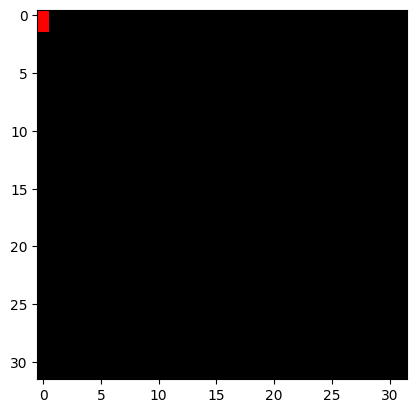

In [ ]:
plt.imshow(gen_imgs[6])

In [ ]:
import os

# Specify the directory path
model_save_path = "/content/drive/MyDrive/models/"

# Create the directory if it doesn't exist
os.makedirs(model_save_path, exist_ok=True)

# Save generator weights
generator.save_weights(os.path.join(model_save_path, "generator1hour.h5"))

# Save discriminator weights
discriminator.save_weights(os.path.join(model_save_path, "discriminator1hour.h5"))


### **8) Making GIF**

In [ ]:
# Display a single image using the epoch number
# def display_image(epoch_no):
#   return PIL.Image.open('generated_images/%.8f.png'.format(epoch_no))

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('generated_images/*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-35-5d911b6b7554>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-35-5d911b6b7554>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
